## Importing Libraries

In [48]:

import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

In [49]:
df=pd.read_csv(r"C:\Users\aamir\Bankloan.csv")
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Educatition,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_stat
0,NaN,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,NaN,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,NaN,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,NaN,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,NaN,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [50]:
bl=pd.DataFrame()

In [51]:
bl['Loan_ID']=df['Loan_ID']

In [52]:
bl.head()

,Loan_ID
0,LP001002
1,LP001003
2,LP001005
3,LP001006
4,LP001008


In [53]:
bl['Gender']=df['Gender']

In [54]:
bl.head()

,Loan_ID,Gender
0,LP001002,Male
1,LP001003,Male
2,LP001005,Male
3,LP001006,Male
4,LP001008,Male


In [55]:
bl['Married']=df['Married']
bl['Dependents']=df['Dependents']
bl['Educatition']=df['Educatition']
bl['Self_Employed']=df['Self_Employed']
bl['ApplicantIncome']=df['ApplicantIncome']
bl['CoapplicantIncome']=df['CoapplicantIncome']
bl['LoanAmount']=df['LoanAmount']
bl['Loan_Amount_Term']=df['Loan_Amount_Term']
bl['Credit_History']=df['Credit_History']
bl['Property_Area']=df['Property_Area']
bl['Loan_status']=df['Loan_stat']

In [56]:
bl.head()

,Loan_ID,Gender,Married,Dependents,Educatition,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
bl=bl.dropna()
bl.isna().any()
bl=bl.drop('Loan_ID',axis=1)
bl['LoanAmount']=(bl['LoanAmount']*1000).astype(int)
Counter(bl['Loan_status'])['Y']/bl['Loan_status'].size

0.6931106471816284

In [60]:
bl.head()

,Gender,Married,Dependents,Educatition,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban,Y


## One Hot Encoding

In [61]:
pre_y=bl['Loan_status']
pre_x=bl.drop('Loan_status',axis=1)
dm_x=pd.get_dummies(pre_x)
dm_y=pre_y.map(dict(Y=1,N=0))
dm_x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Educatition_Graduate,Educatition_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0.0,3232,1950.0,108000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
609,0.0,2900,0.0,71000,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40000,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [62]:
dm_y

1      0
2      1
3      1
4      1
5      1
      ..
608    1
609    1
610    1
611    1
612    1
Name: Loan_status, Length: 479, dtype: int64

## Sampling and Scaling

In [63]:
smote=SMOTE(sampling_strategy='minority')
X1,y=smote.fit_sample(dm_x,dm_y)
sc=MinMaxScaler()
X=sc.fit_transform(X1)
import pickle
from sklearn.externals import joblib
filename='scalers.pkl'
joblib.dump(X,filename)

['scalers.pkl']

In [64]:
Counter(y)

Counter({0: 332, 1: 332})

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

## Creating Neural Network and Training it

In [69]:
classifier=Sequential()
classifier.add(Dense(200,activation='relu',kernel_initializer='random_normal',input_dim=X_test.shape[1]))
classifier.add(Dense(400,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(4,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X_train,y_train,batch_size=20,epochs=100,verbose=0)
eval_model=classifier.evaluate(X_train,y_train)
eval_model

531/531 [==============================] - 0s 49us/step


[0.2218789360336889, 0.9077212810516357]

In [66]:
print(X_test.shape)
print(X_train.shape)

(133, 17)
(531, 17)


In [74]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

## Plotting Confusion Matrix

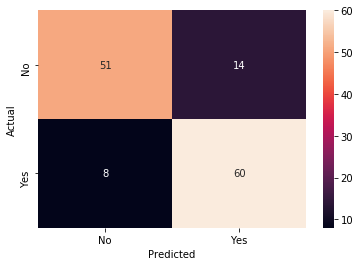

In [75]:
cm=confusion_matrix(y_test,y_pred)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax);

ax.set_xlabel('Predicted');
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(['No','Yes']);
ax.yaxis.set_ticklabels(['No','Yes']);

## Saving the model as pickle file for use in future

In [76]:
import pickle
from sklearn.externals import joblib
filename='bankloan_model.pkl'
joblib.dump(classifier,filename)

['bankloan_model.pkl']

In [89]:
mdl=joblib.load('bankloan_model.pkl')